## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split


### Reading Data

In [13]:
train_df = pd.read_csv('train.csv')
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


## Explorartory Data Analysis

In [16]:
pivot_table = train_df.pivot_table(
        values=['tBodyAcc-mean()-X', 'tGravityAcc-mean()-X', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y'],
        index='Activity', 
        aggfunc=['max', 'min']
    )
    
# Display the pivot table
pivot_table

max                                        \
                   tBodyAcc-energy()-X tBodyAcc-energy()-Y tBodyAcc-mean()-X   
Activity                                                                       
LAYING                       -0.266056            1.000000          1.000000   
SITTING                      -0.878838           -0.549644          0.559135   
STANDING                     -0.952634           -0.752859          0.631510   
WALKING                      -0.303152           -0.463674          0.433256   
WALKING_DOWNSTAIRS            1.000000           -0.296384          0.617597   
WALKING_UPSTAIRS             -0.207085           -0.457341          0.480180   

                                                        min  \
                   tGravityAcc-mean()-X tBodyAcc-energy()-X   
Activity                                                      
LAYING                         0.263316           -1.000000   
SITTING                        0.991549           -0.999999   
STANDING                       0.983585           -0.999999   
WALKING                        0.983300           -0.956675   
WALKING_DOWNSTAIRS             0.985272           -0.847275   
WALKING_UPSTAIRS               0.982172           -0.930700   

                                                                               
                   tBodyAcc-energy()-Y tBodyAcc-mean()-X tGravityAcc-mean()-X  
Activity                                                                       
LAYING                       -0.999994         -1.000000            -1.000000  
SITTING                      -0.999999         -0.412659             0.173269  
STANDING                     -0.999997          0.111231             0.774512  
WALKING                      -0.964136          0.121465             0.762846  
WALKING_DOWNSTAIRS           -0.954863         -0.161088             0.759165  
WALKING_UPSTAIRS             -0.947947         -0.061041             0.574542

In [4]:
fig = px.histogram(
    train_df, 
    x='Activity', 
    color='Activity',  # Adds color differentiation
    title="Distribution of Activity",
    labels={'Activity': 'Activity Type', 'count': 'Frequency'},
    template="plotly_dark"  # Change to "seaborn" or "ggplot2" if preferred
)

fig.update_layout(
    xaxis_tickangle=-45,  # Rotates x-axis labels for readability
    bargap=0.1,  # Adds space between bars
    showlegend=False  # Hide legend if not needed
)

fig.show()

In [5]:

fig = px.scatter(
    train_df, 
    x='tBodyAcc-mean()-X', 
    y='tGravityAcc-mean()-X', 
    color='Activity',  
    title="Relationship between Body Acceleration & Gravity Acceleration",
    labels={'tBodyAcc-mean()-X': 'Body Acceleration Mean (X)', 
            'tGravityAcc-mean()-X': 'Gravity Acceleration Mean (X)', 
            'Activity': 'Activity Type'},
    template="plotly_dark",  # Clean background style
    opacity=0.7,  # Slight transparency for better overlapping visibility
)

# Further layout and styling adjustments
fig.update_traces(marker=dict(size=8, line=dict(width=1, color='black')))  # Enhances marker visibility

fig.update_layout(
    font=dict(family="Arial, sans-serif", size=14),
    xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False),
    legend=dict(title="Activity Type", bgcolor="rgba(255,255,255,0.6)"),  # Slight transparency for clarity
)

fig.show()

In [17]:
fig = px.scatter(
    train_df, 
    x='angle(X,gravityMean)', 
    y='angle(Y,gravityMean)', 
    color='Activity',  
    title="Relationship between angle(X,gravityMean) & angle(Y,gravityMean)",
    labels={'angle(X,gravityMean)': 'Gravity Mean Angle at X', 
            'angle(Y,gravityMean)': 'Gravity Mean Angle at Y', 
            'Activity': 'Activity Type'},
    template="plotly_dark",  # Clean background style
    opacity=0.7,  # Slight transparency for better overlapping visibility
)

# Further layout and styling adjustments
fig.update_traces(marker=dict(size=8, line=dict(width=1, color='black')))  # Enhances marker visibility

fig.update_layout(
    font=dict(family="Arial, sans-serif", size=14),
    xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False),
    legend=dict(title="Activity Type", bgcolor="rgba(255,255,255,0.6)"),  # Slight transparency for clarity
)

fig.show()

In [6]:
fig = px.scatter(
    train_df, 
    x='tBodyAcc-energy()-X', 
    y='tBodyAcc-energy()-Y', 
    color='Activity',  
    title="Relationship between Energy of 2 axis.",
    labels={'tBodyAcc-energy()-X': 'Body Acceleration Energy (X)', 
            'tBodyAcc-energy()-Y': 'Body Acceleration Energy (Y)', 
            'Activity': 'Activity Type'},
    template="plotly_dark",  # Clean background style
    opacity=0.7,  # Slight transparency for better overlapping visibility
)

# Further layout and styling adjustments
fig.update_traces(marker=dict(size=8, line=dict(width=1, color='black')))  # Enhances marker visibility

fig.update_layout(
    font=dict(family="Arial, sans-serif", size=14),
    xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False),
    legend=dict(title="Activity Type", bgcolor="rgba(255,255,255,0.6)"),  # Slight transparency for clarity
)

fig.show()

In [8]:
fig = px.box(train_df, 
             x='Activity',  # Group by Activity
             y='tBodyAcc-energy()-X',  # The variable to analyze
             color='Activity',  # Color by Activity
             points='all',  # Show all points (use 'outliers' to show only outliers)
             title="Box Plot of tBodyAcc-energy()-X by Activity")

fig.show()

In [9]:
#angle(X,gravityMean)
fig = px.box(train_df, 
             x='Activity',  # Group by Activity
             y='angle(X,gravityMean)',  # The variable to analyze
             color='Activity',  # Color by Activity
             points='all',  # Show all points (use 'outliers' to show only outliers)
             title="Box Plot of angle(X,gravityMean) by Activity")

fig.show()

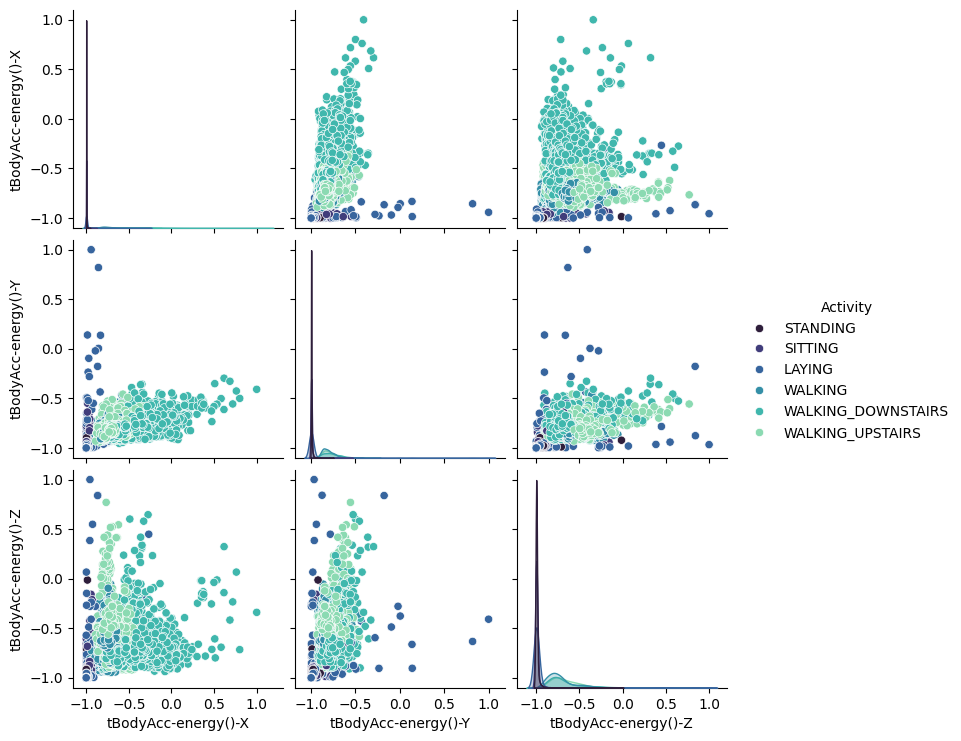

In [10]:
selected_features = ["tBodyAcc-energy()-X", "tBodyAcc-energy()-Y", "tBodyAcc-energy()-Z", "Activity"]
sns.pairplot(train_df[selected_features], hue="Activity", diag_kind="kde", palette="mako")
plt.show()

In [7]:
# Combine boths dataframes
train_df['Data'] = 'Train'
test_df['Data'] = 'Test'
both_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
both_df['subject'] = '#' + both_df['subject'].astype(str)

# Create label
label = both_df.pop('Activity')

print('Shape Train:\t{}'.format(train_df.shape))
print('Shape Test:\t{}\n'.format(test_df.shape))

train_df.head()

Shape Train:	(7352, 564)
Shape Test:	(2947, 564)



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


In [ ]:
# Combine boths dataframes
train_df['Data'] = 'Train'
test_df['Data'] = 'Test'
both_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
both_df['subject'] = '#' + both_df['subject'].astype(str)

# Create label
label = both_df.pop('Activity')

print('Shape Train:\t{}'.format(train_df.shape))
print('Shape Test:\t{}\n'.format(test_df.shape))

train_df.head()

Shape Train:	(7352, 564)
Shape Test:	(2947, 564)



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


In [8]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [9]:
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(both_df.isna().sum().sum()))
both_df.info()

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(2)
memory usage: 44.2+ MB


In [10]:
both_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1,Train


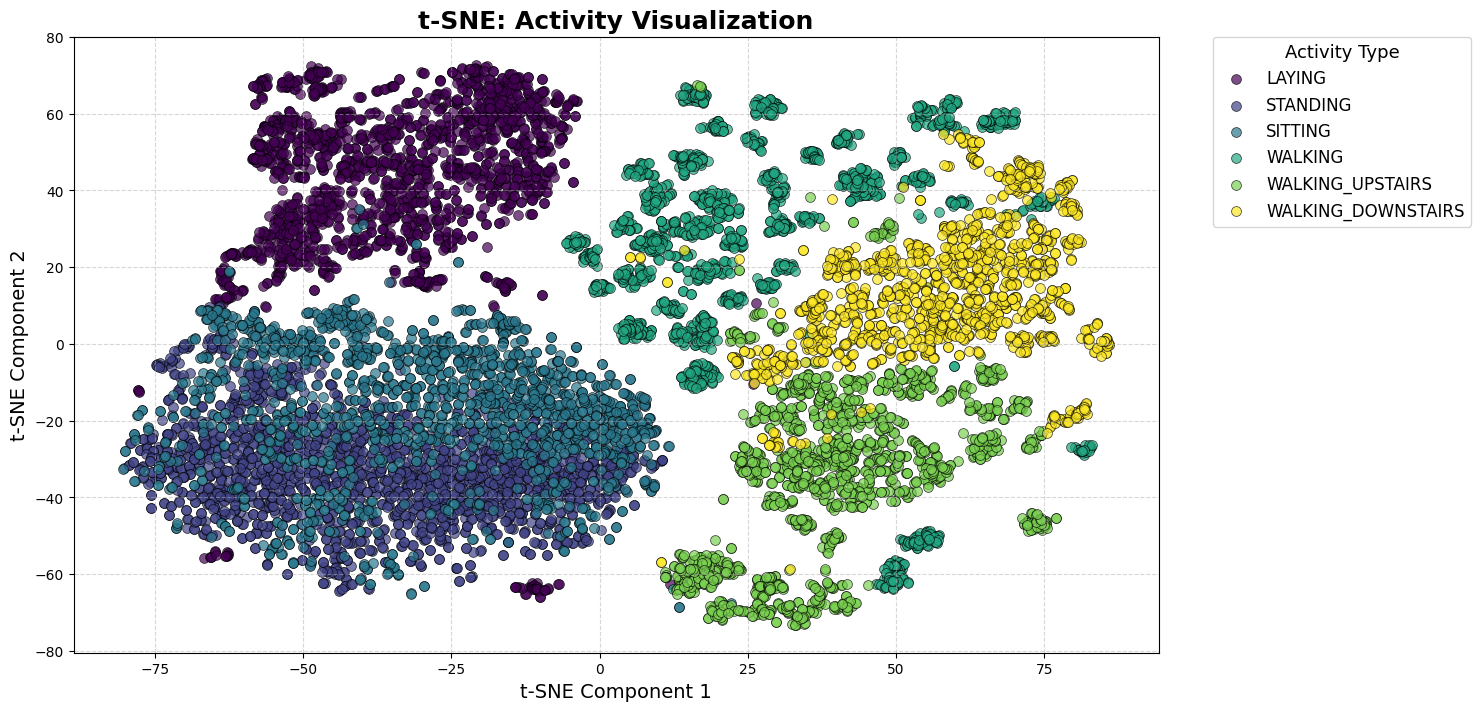

In [11]:
# Copy data
tsne_data = both_df.copy()
subject = tsne_data.pop('subject')
data = tsne_data.pop('Data')

# Standardize data
scaler = StandardScaler()
tsne_data = scaler.fit_transform(tsne_data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.9)
tsne_data = pca.fit_transform(tsne_data)

# Apply t-SNE
tsne = TSNE(random_state=42, perplexity=30, learning_rate=200)
tsne_transform = tsne.fit_transform(tsne_data)

# Setup figure
fig, ax = plt.subplots(figsize=(14, 8))

# Get labels
label = label  # Ensure this matches your dataset
label_counts = label.value_counts()

# Generate colors
n = label.nunique()
colormap = plt.cm.get_cmap('viridis', n)
colors = [rgb2hex(colormap(i)) for i in range(n)]

# Plot each activity
for i, group in enumerate(label_counts.index):
    mask = (label == group).values
    sns.scatterplot(
        x=tsne_transform[mask][:, 0], 
        y=tsne_transform[mask][:, 1], 
        color=colors[i], 
        alpha=0.7, 
        s=50,  # Marker size
        label=group, 
        edgecolor='black'
    )

# Styling & Labels
ax.set_title("t-SNE: Activity Visualization", fontsize=18, fontweight='bold')
ax.set_xlabel("t-SNE Component 1", fontsize=14)
ax.set_ylabel("t-SNE Component 2", fontsize=14)

# Move legend outside
ax.legend(
    title="Activity Type", 
    fontsize=12, 
    title_fontsize=13, 
    bbox_to_anchor=(1.05, 1),  # Moves legend outside
    loc='upper left',  
    borderaxespad=0
)

plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

### Scaling and Encoding Data

In [12]:
scaler = StandardScaler()
encoder = LabelEncoder()
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


In [13]:
X = train_df.drop(columns=['subject', 'Activity', 'Data'])
y = train_df[['Activity']]

X_scaled = scaler.fit_transform(X)
y_encoded = encoder.fit_transform(y)

X_scaled

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ..., -0.56584847,
         0.64059683,  0.34870928],
       [ 0.21586648, -0.02812252, -0.86770988, ..., -0.57766781,
         0.63147758,  0.29327564],
       [ 1.09620157,  0.12919873, -1.67268082, ..., -0.57392691,
         0.63274259,  0.33396081]])

In [14]:
X_train_df = pd.DataFrame(X_scaled, columns=X.columns)
X_train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225


In [15]:
y_train_df = pd.DataFrame(y_encoded, columns=['Activity'])
y_train_df

,Activity
0,2
1,2
2,2
3,2
4,2
...,...
7347,5
7348,5
7349,5
7350,5


### Training Models without using Principal Component Analysis

In [16]:
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING,Test
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING,Test
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING,Test
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING,Test
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING,Test


In [17]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X_train_df, y_train_df, test_size=0.2, random_state=42, shuffle=True, stratify=y_train_df)

X_test = test_df.drop(columns=['subject', 'Activity', 'Data'])
y_test = test_df[['Activity']]

X_test_scaled = scaler.transform(X_test)
y_test_encoded = encoder.transform(y_test)

X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
y_test = pd.DataFrame(y_test_encoded, columns=['Activity'])

In [18]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
2986,0.107718,-0.067335,-0.206173,0.226048,0.413954,0.814838,0.286760,0.332543,0.941109,0.029708,...,0.802219,-0.556623,-0.603993,-0.995333,0.075962,-1.270166,1.337230,-0.355429,0.582006,0.944544
5340,1.438011,0.228317,-0.583631,-0.712397,-0.889650,-0.745177,-0.685488,-0.890314,-0.727941,-0.705880,...,-0.802284,-0.659964,-0.681765,-0.037201,-0.050510,-0.566345,0.493172,1.819999,-2.102761,-1.304932
6556,1.400938,-0.360242,0.493372,0.881215,0.900317,0.976710,0.911305,0.984582,0.995589,0.619658,...,-0.487256,-0.467987,-0.445842,-1.909545,1.075064,1.356307,-0.838773,-0.509775,0.601341,0.641930
5537,-0.058163,0.054613,0.562497,-0.869100,-0.924142,-0.834062,-0.861665,-0.930889,-0.836819,-0.868206,...,0.983501,-1.359938,-1.036592,-0.019575,-0.138535,-0.325563,-1.208891,-0.704726,0.139097,-0.126082
3728,-0.131242,-0.535138,0.945034,1.007936,1.287219,0.993097,1.026030,1.524054,0.996415,1.396738,...,0.490679,2.053419,2.544730,0.042601,1.016132,1.146665,-0.576488,-0.536321,0.670842,0.382362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,0.059547,0.043263,0.071103,-0.873599,-0.958015,-0.930624,-0.865220,-0.957735,-0.936071,-0.870428,...,1.163360,-0.468986,-0.616142,0.238472,-1.287301,-0.725447,1.517655,-0.317562,0.808343,0.745922
201,0.074199,0.046241,0.003868,-0.876555,-0.961266,-0.924761,-0.868181,-0.959718,-0.933563,-0.873346,...,2.438077,-1.710133,-1.083550,-0.479146,-0.090440,0.812435,1.669722,-0.368585,0.872251,0.384732
4492,0.176753,0.446170,0.528322,1.177404,1.379160,1.180202,1.301090,0.972827,1.167074,0.690305,...,0.492200,2.744795,3.199842,-0.125468,-0.569784,-0.296747,-0.846281,-0.529241,0.636551,0.006228
5581,-0.098923,-0.027167,0.116375,-0.866490,-0.961617,-0.921412,-0.858197,-0.963960,-0.932781,-0.870754,...,0.545393,0.692603,0.525956,-0.446225,0.720611,-0.186108,0.599131,2.428229,-2.121032,-1.275899


In [19]:
X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.246388,-0.136979,1.668462,-0.742061,-0.814056,-0.150313,-0.759330,-0.819786,-0.164580,-0.781407,...,-0.213757,-0.072779,-0.262320,-0.006596,0.358560,-1.372126,0.579845,-0.450322,0.733571,-0.005244
1,0.164235,0.111059,-0.175548,-0.824544,-0.908299,-0.812607,-0.840212,-0.908595,-0.820280,-0.781407,...,-2.097734,0.576855,0.098679,-0.273719,0.034161,-0.728470,1.938673,-0.407493,0.748840,-0.098112
2,0.014187,-0.204740,-0.159111,-0.865561,-0.913208,-0.855099,-0.858146,-0.913397,-0.862926,-0.864367,...,-0.248637,0.363213,-0.050207,-0.129586,0.446413,0.091042,0.316041,-0.416639,0.744605,-0.081803
3,-0.059637,-0.365579,-0.147960,-0.867620,-0.919858,-0.865472,-0.860199,-0.921086,-0.876002,-0.863173,...,-0.034259,-0.116542,-0.360349,-0.076465,0.339639,0.544845,0.632687,-0.409180,0.758155,-0.073784
4,0.004908,-0.248785,-0.359980,-0.865636,-0.908274,-0.892234,-0.857457,-0.903555,-0.896405,-0.863173,...,-0.984174,-0.709294,-0.719531,-0.032386,-0.094211,1.196836,-0.235517,-0.396070,0.780371,-0.062135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.507661,-0.874731,0.177151,0.707754,0.736850,0.930750,0.647171,0.778197,0.903402,1.201017,...,-0.202496,-0.215797,-0.408096,-1.027739,0.767627,1.440462,-1.449764,-0.316909,0.726262,0.864551
2943,1.265313,-0.527316,0.056964,0.668705,1.072571,0.975451,0.606004,1.022561,0.811203,1.201017,...,-0.093371,-0.041773,-0.243789,-2.213376,-0.836706,-1.095164,0.687383,-0.323647,0.722737,0.856052
2944,1.074319,1.170681,-0.117372,0.614660,0.932720,0.846927,0.571863,0.810133,0.625756,0.874320,...,-0.763187,0.586175,0.514088,-0.564919,0.192712,1.130990,0.772310,-0.323991,0.725764,0.851650
2945,-0.525137,0.886163,0.223235,0.629199,0.559404,0.948698,0.561574,0.508938,0.764738,0.874320,...,-0.684366,0.316410,0.024572,1.294302,-1.832296,1.513441,-0.005058,-0.332514,0.693165,0.874507


In [20]:
X_val

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
3221,-1.227435,2.350335,-0.821153,0.543946,0.733385,1.147306,0.450587,0.735929,1.074772,0.396081,...,0.517312,-1.584674,-1.041766,0.217240,1.872923,-1.454981,1.055733,-0.321097,-0.150332,1.105609
6106,-0.049966,0.035119,0.103078,-0.873460,-0.961730,-0.921201,-0.865874,-0.960824,-0.929484,-0.872770,...,-0.395055,-0.379875,-0.327189,0.452019,-0.289101,0.098628,0.182217,-0.084761,-0.567074,-0.637601
3478,0.685037,-2.500175,-1.331526,-0.744430,-0.574606,0.060774,-0.744847,-0.527396,0.031274,-0.594240,...,-2.854681,1.512749,1.054193,-0.463988,0.386262,0.817923,0.045843,-0.829865,0.287413,0.408644
4089,-0.028393,0.006239,0.034762,-0.844040,-0.953040,-0.913321,-0.835122,-0.950788,-0.921317,-0.834688,...,-0.955316,-0.017888,-0.438309,-0.024981,-0.262438,-0.746674,0.366392,1.747066,-1.346961,-2.110682
4799,-0.830737,-0.104172,0.686615,0.701811,0.575915,1.605205,0.694635,0.400122,1.602657,0.947555,...,-0.061956,0.698059,0.406372,1.694781,-1.778756,1.510975,-0.551365,-0.564259,0.472681,0.695212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,0.052514,0.054600,0.143988,-0.874034,-0.950348,-0.890984,-0.867253,-0.946975,-0.894113,-0.872423,...,0.357164,-1.053106,-0.925313,0.003794,0.134718,-0.921680,-0.226411,-0.701383,0.485120,0.271316
1051,-2.902958,0.577973,-1.584735,-0.755450,-0.745951,-0.705710,-0.756610,-0.759452,-0.704182,-0.848206,...,1.951115,-0.799630,-0.705130,-0.040662,-0.167264,-1.102646,-0.045609,1.904318,-3.015832,-0.286902
6170,0.762783,-0.699705,-0.587459,0.696139,0.663499,0.884923,0.632358,0.720807,0.898891,1.105227,...,0.265894,0.309814,0.221615,-1.499711,1.305787,-0.833428,-0.982634,-0.431702,0.585405,0.813446
3555,-1.280874,-0.123642,-0.420915,0.869227,1.059663,0.731737,0.857186,1.138171,0.709885,0.948364,...,-0.483785,-0.334274,-0.513542,1.714129,0.379439,-1.314999,-0.195720,-0.423752,0.734672,0.615587


In [21]:
y_train, y_val, y_test

(      Activity
 2986         3
 5340         0
 6556         3
 5537         1
 3728         3
 ...        ...
 3983         2
 201          2
 4492         3
 5581         0
 5661         5
 
 [5881 rows x 1 columns],
       Activity
 3221         5
 6106         1
 3478         1
 4089         0
 4799         3
 ...        ...
 5896         2
 1051         0
 6170         3
 3555         3
 1781         2
 
 [1471 rows x 1 columns],
       Activity
 0            2
 1            2
 2            2
 3            2
 4            2
 ...        ...
 2942         5
 2943         5
 2944         5
 2945         5
 2946         5
 
 [2947 rows x 1 columns])

In [22]:
def train_evaluate_models(X_train, y_train, X_val, y_val, X_test, y_test):
  models = {
          'Random Forest': RandomForestClassifier(random_state=42),
          'SVM': SVC(probability=True, random_state=42),
          'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
          'Decision Tree': DecisionTreeClassifier(random_state=42),
          'Naive Bayes': GaussianNB(),
          'Gradient Boosting': GradientBoostingClassifier(random_state=42),
          'AdaBoost': AdaBoostClassifier(random_state=42),
          'XGBoost': XGBClassifier(random_state=42)
      }

  # Store metrics
  metrics = {'Model': [], 'Train Accuracy': [], 'Validation Accuracy': [], 'Test Accuracy': [],
              'Train Precision': [], 'Validation Precision': [], 'Test Precision': [],
                'Train Recall': [], 'Validation Recall': [], 'Test Recall': [],
                  'Train F1 Score': [], 'Validation F1 Score': [], 'Test F1 Score': []}

  for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      metrics['Model'].append(name)
      metrics['Train Accuracy'].append(accuracy_score(y_train, model.predict(X_train)))
      metrics['Validation Accuracy'].append(accuracy_score(y_val, model.predict(X_val)))
      metrics['Test Accuracy'].append(accuracy_score(y_test, y_pred))
      metrics['Train Precision'].append(precision_score(y_train, model.predict(X_train), average='weighted', zero_division=0))
      metrics['Validation Precision'].append(precision_score(y_val, model.predict(X_val), average='weighted', zero_division=0))
      metrics['Test Precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
      metrics['Train Recall'].append(recall_score(y_train, model.predict(X_train), average='weighted'))
      metrics['Validation Recall'].append(recall_score(y_val, model.predict(X_val), average='weighted'))
      metrics['Test Recall'].append(recall_score(y_test, y_pred, average='weighted'))
      metrics['Train F1 Score'].append(f1_score(y_train, model.predict(X_train), average='weighted'))
      metrics['Validation F1 Score'].append(f1_score(y_val, model.predict(X_val), average='weighted'))
      metrics['Test F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

  # Convert to DataFrame
  metrics_df = pd.DataFrame(metrics) 
  return metrics_df

In [ ]:
results_without_pca = train_evaluate_models(X_train, y_train, X_val, y_val, X_test, y_test) # Time = 8m 23.5s

In [24]:
results_without_pca

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Train Precision,Validation Precision,Test Precision,Train Recall,Validation Recall,Test Recall,Train F1 Score,Validation F1 Score,Test F1 Score
0,Random Forest,1.000000,0.985724,0.924669,1.000000,0.985855,0.926355,1.000000,0.985724,0.924669,1.000000,0.985722,0.924285
1,SVM,0.986227,0.977566,0.948761,0.986233,0.977616,0.949240,0.986227,0.977566,0.948761,0.986228,0.977570,0.948622
2,K-Nearest Neighbors,0.979425,0.963290,0.876824,0.979707,0.964913,0.885172,0.979425,0.963290,0.876824,0.979383,0.963183,0.875456
3,Decision Tree,1.000000,0.938817,0.850356,1.000000,0.939020,0.851921,1.000000,0.938817,0.850356,1.000000,0.938784,0.849108
4,Naive Bayes,0.755314,0.763426,0.767900,0.783616,0.791393,0.781352,0.755314,0.763426,0.767900,0.754356,0.762959,0.763257
5,Gradient Boosting,1.000000,0.986404,0.932474,1.000000,0.986512,0.933286,1.000000,0.986404,0.932474,1.000000,0.986396,0.932352
6,AdaBoost,0.544975,0.545207,0.531049,0.350072,0.350452,0.336286,0.544975,0.545207,0.531049,0.409262,0.409596,0.394408
7,XGBoost,1.000000,0.994562,0.937224,1.000000,0.994624,0.938218,1.000000,0.994562,0.937224,1.000000,0.994560,0.937013


In [25]:
results_without_pca.to_csv('Model_Metrics_Without_PCA.csv', index=False)

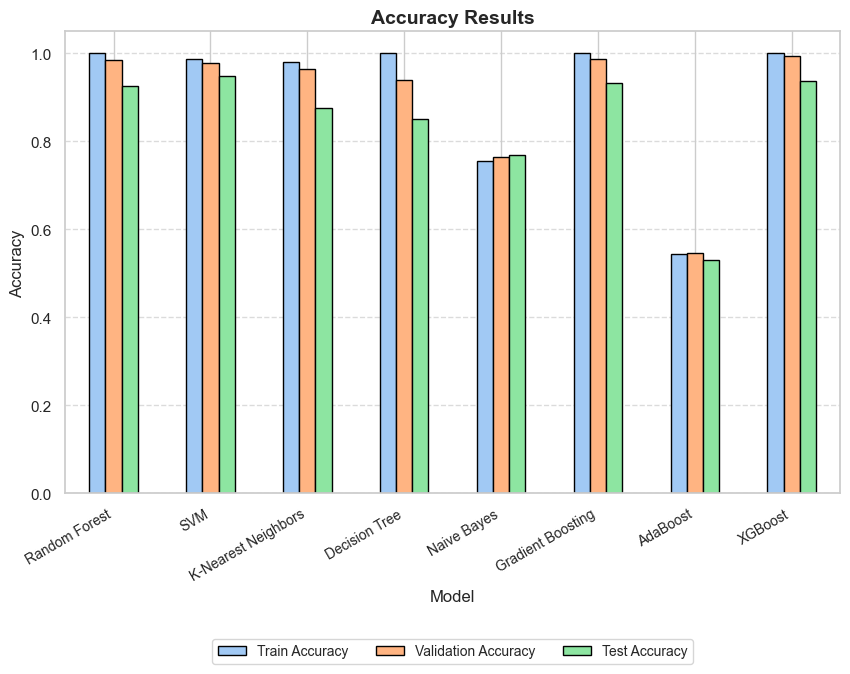

In [26]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Define color palette
colors = sns.color_palette("pastel")[:3]  

# Create bar plot
ax = results_without_pca.plot(
    x="Model", 
    y=["Train Accuracy", "Validation Accuracy", "Test Accuracy"], 
    kind="bar", 
    figsize=(10,6), 
    color=colors, 
    edgecolor="black"
)

# Customize title and labels
ax.set_title('Accuracy Results', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha="right", fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust legend position (placed just below x-axis label)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=10)

# Show plot
plt.show()

### Training models using Principal Components derived from Principal component Analysis (PCA)

### The scree plot shows how much variance each principal component captures. The cumulative variance curve helps determine how many components are needed to retain 70%, 80%, or 90% of the total information. The goal is to pick the fewest components that preserve enough variance while reducing complexity.

In [27]:
X_train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225


In [28]:
# Apply PCA
pca = PCA(n_components=63)  # Choose number of components
X_pca = pca.fit_transform(X_train_df)

# Calculate total variance percentage
total_variance = np.sum(pca.explained_variance_ratio_) * 100

# Print result
print(f"Total Variance Explained by Selected Components: {total_variance:.2f}%")

Total Variance Explained by Selected Components: 90.05%


#### 90% variance is a reasonable choice for many real-world applications, especially when you are aiming for a balance between efficiency and model performance.

In [29]:
pca = PCA(n_components=63)
pca_components = pca.fit_transform(X_train_df)
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63
0,-16.138544,2.152024,-3.144780,0.272464,-6.798938,-4.249394,2.937159,-4.905413,0.775515,3.627737,...,1.202504,1.453239,0.518271,1.069088,-1.015405,0.233400,-0.770759,0.067950,0.382774,-1.078217
1,-15.296194,1.387144,0.682221,-2.813677,-4.266170,-2.055663,0.011205,-1.845985,-0.492546,0.180175,...,0.512490,1.873529,0.104559,-1.380235,0.028460,1.127166,-0.120667,0.233644,0.106987,-0.034963
2,-15.137019,2.473351,1.756641,-3.717974,-4.181557,-1.357518,0.072947,-1.388188,-0.539754,0.671712,...,0.359448,-0.534305,-0.501512,0.472763,-0.865773,-0.663759,-1.272343,-0.424568,-1.153452,0.465598
3,-15.350884,3.915681,1.790322,-2.567521,-3.205840,-0.942944,0.530736,-1.832185,-1.071517,1.496989,...,0.116972,0.433841,1.314230,0.891354,-0.237260,-0.953606,-1.873607,-0.774201,-2.234938,0.801518
4,-15.544814,4.598737,2.188582,-2.897578,-3.080150,-1.061458,-1.048591,-0.816933,-0.600063,-1.118875,...,-0.826904,-0.185339,-0.088551,0.414524,0.472276,0.794543,-0.483120,0.062439,-0.764861,0.029698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,15.465060,-12.536306,-1.999177,-3.457724,1.523194,-2.699127,-3.561252,2.418693,-0.383180,-1.308722,...,-1.077049,-1.940167,0.485616,1.889302,-1.103543,0.430878,0.700338,0.050408,-0.913617,0.032421
7348,14.222722,-10.253501,-2.377660,-2.802667,1.325313,-4.346117,-2.193966,0.032140,0.528929,-0.702509,...,-1.415613,-0.664843,0.364231,0.671005,-0.866407,-0.232716,1.475086,-0.068610,-0.898508,-0.192581
7349,14.333436,-12.260712,-4.025946,-3.849780,2.860490,-3.624049,-3.929641,-0.873163,0.746331,1.575526,...,-0.786257,-0.072289,-1.147961,-0.090801,-1.334557,-1.336172,0.961825,0.283054,-1.852759,-0.385008
7350,12.876019,-14.071256,-2.916061,-5.013426,3.938225,-2.137607,-5.390400,0.321305,0.916300,1.646371,...,-1.933066,-0.926130,-0.483486,1.044304,-1.357101,-0.578386,0.570759,0.000389,-1.520194,0.415937


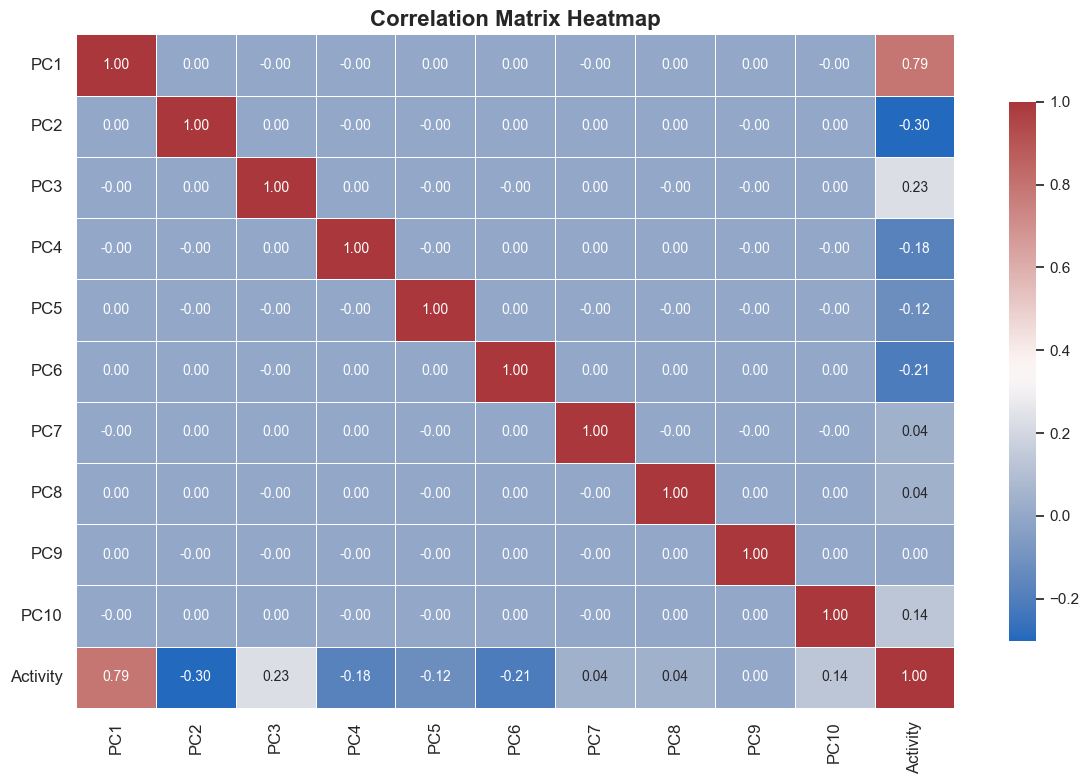

In [30]:
corr_pca = PCA(n_components=10)
corr_pca_components = corr_pca.fit_transform(X_train_df)
corr_pca_df = pd.DataFrame(corr_pca_components, columns=[f'PC{i+1}' for i in range(corr_pca.n_components_)])
corr_pca_df

# Concatenate PCA features and target variable
corr_final_df = pd.concat([corr_pca_df, y_train_df], axis=1)

# Compute correlation matrix
correlation_matrix = corr_final_df.corr()

# Create heatmap with adjusted size and rotated labels
plt.figure(figsize=(12,8))  # Increase figure size to fit all columns

# Plot heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt='.2f', linewidths=0.5, 
            annot_kws={'size': 10}, cbar_kws={'shrink': 0.8})

# Rotate x and y labels to avoid overlap
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Set title and show the plot
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [31]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63
0,-16.138544,2.152024,-3.144780,0.272464,-6.798938,-4.249394,2.937159,-4.905413,0.775515,3.627737,...,1.202504,1.453239,0.518271,1.069088,-1.015405,0.233400,-0.770759,0.067950,0.382774,-1.078217
1,-15.296194,1.387144,0.682221,-2.813677,-4.266170,-2.055663,0.011205,-1.845985,-0.492546,0.180175,...,0.512490,1.873529,0.104559,-1.380235,0.028460,1.127166,-0.120667,0.233644,0.106987,-0.034963
2,-15.137019,2.473351,1.756641,-3.717974,-4.181557,-1.357518,0.072947,-1.388188,-0.539754,0.671712,...,0.359448,-0.534305,-0.501512,0.472763,-0.865773,-0.663759,-1.272343,-0.424568,-1.153452,0.465598
3,-15.350884,3.915681,1.790322,-2.567521,-3.205840,-0.942944,0.530736,-1.832185,-1.071517,1.496989,...,0.116972,0.433841,1.314230,0.891354,-0.237260,-0.953606,-1.873607,-0.774201,-2.234938,0.801518
4,-15.544814,4.598737,2.188582,-2.897578,-3.080150,-1.061458,-1.048591,-0.816933,-0.600063,-1.118875,...,-0.826904,-0.185339,-0.088551,0.414524,0.472276,0.794543,-0.483120,0.062439,-0.764861,0.029698


In [32]:
y_train_df

,Activity
0,2
1,2
2,2
3,2
4,2
...,...
7347,5
7348,5
7349,5
7350,5


In [33]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.246388,-0.136979,1.668462,-0.742061,-0.814056,-0.150313,-0.759330,-0.819786,-0.164580,-0.781407,...,-0.213757,-0.072779,-0.262320,-0.006596,0.358560,-1.372126,0.579845,-0.450322,0.733571,-0.005244
1,0.164235,0.111059,-0.175548,-0.824544,-0.908299,-0.812607,-0.840212,-0.908595,-0.820280,-0.781407,...,-2.097734,0.576855,0.098679,-0.273719,0.034161,-0.728470,1.938673,-0.407493,0.748840,-0.098112
2,0.014187,-0.204740,-0.159111,-0.865561,-0.913208,-0.855099,-0.858146,-0.913397,-0.862926,-0.864367,...,-0.248637,0.363213,-0.050207,-0.129586,0.446413,0.091042,0.316041,-0.416639,0.744605,-0.081803
3,-0.059637,-0.365579,-0.147960,-0.867620,-0.919858,-0.865472,-0.860199,-0.921086,-0.876002,-0.863173,...,-0.034259,-0.116542,-0.360349,-0.076465,0.339639,0.544845,0.632687,-0.409180,0.758155,-0.073784
4,0.004908,-0.248785,-0.359980,-0.865636,-0.908274,-0.892234,-0.857457,-0.903555,-0.896405,-0.863173,...,-0.984174,-0.709294,-0.719531,-0.032386,-0.094211,1.196836,-0.235517,-0.396070,0.780371,-0.062135


In [34]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(pca_df, y_train_df, test_size=0.2, random_state=42, shuffle=True, stratify=y_train_df)

pca_components = pca.transform(X_test)
X_test = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

In [35]:
X_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63
0,-10.262280,-1.429259,-1.756266,-1.471646,-3.628867,-0.648441,3.422117,-2.037576,-2.686782,-1.060198,...,0.829438,1.131240,-1.516419,-0.489135,-0.280560,0.215189,2.344550,0.508406,0.277722,-1.199742
1,-13.070632,-0.862309,0.407785,-2.961993,-3.346329,1.482588,-0.524768,0.242094,0.602578,-1.924923,...,1.536158,0.440561,-0.297271,-0.965521,0.116919,0.236690,0.028743,-1.356690,1.412411,-0.315401
2,-14.239412,2.576799,2.190182,-2.474236,-2.239261,-0.638699,1.304945,-1.683838,-2.656168,1.949818,...,-0.457679,-0.715382,-1.110874,-1.646604,0.001005,-0.589507,0.994859,-0.394282,0.614162,0.490195
3,-14.482305,2.087274,1.640800,-2.595560,-2.902612,-1.654429,-0.030258,-1.147152,-1.490350,1.882322,...,-0.389857,-0.682326,-0.425501,-2.168534,0.276098,-0.913805,0.811898,-0.181866,0.266876,0.525972
4,-13.776189,-1.402332,1.416319,-2.447932,-3.926211,0.220251,-1.200678,1.454476,-0.204931,-0.965680,...,-0.100793,-0.366101,-0.650896,-0.142721,-1.447595,-1.061367,0.008550,-0.724683,-0.732546,0.979500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,9.917708,-6.379428,1.586964,-2.957605,1.975559,2.434742,0.177811,3.965604,0.985111,0.007726,...,0.011669,0.047899,0.554928,-1.767994,-0.430014,-0.370409,-0.788461,-0.771074,-0.838554,-0.284937
2943,11.854556,-4.843925,1.233584,-2.723779,1.426104,0.187473,0.535014,1.959160,1.452758,-1.473600,...,0.639898,0.955494,0.220709,-1.717707,-0.532712,0.088040,0.939570,-1.700860,-0.491831,-0.358886
2944,11.521882,-3.432224,-1.371388,-2.366068,-0.285842,0.425378,1.252286,0.108566,1.199111,-0.256595,...,-0.385885,0.179979,1.154517,-0.915537,-1.446172,-1.283812,-0.101271,3.140924,1.689938,-0.062902
2945,7.974009,-4.224234,-0.532889,-3.469087,0.168507,1.086786,1.943950,1.354375,1.604788,0.489318,...,-0.459026,-0.162047,1.377752,0.530387,1.154223,-0.602245,0.833523,-0.011407,-0.206381,1.891949


In [36]:
y_train, y_test

(      Activity
 2986         3
 5340         0
 6556         3
 5537         1
 3728         3
 ...        ...
 3983         2
 201          2
 4492         3
 5581         0
 5661         5
 
 [5881 rows x 1 columns],
       Activity
 0            2
 1            2
 2            2
 3            2
 4            2
 ...        ...
 2942         5
 2943         5
 2944         5
 2945         5
 2946         5
 
 [2947 rows x 1 columns])

In [ ]:
results_with_pca = train_evaluate_models(X_train, y_train, X_val, y_val, X_test, y_test) # Time = 1m 9.2s

In [38]:
results_with_pca

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Train Precision,Validation Precision,Test Precision,Train Recall,Validation Recall,Test Recall,Train F1 Score,Validation F1 Score,Test F1 Score
0,Random Forest,1.000000,0.925221,0.882592,1.000000,0.926418,0.886799,1.000000,0.925221,0.882592,1.000000,0.924619,0.881757
1,SVM,0.963102,0.960571,0.916525,0.963146,0.961309,0.918802,0.963102,0.960571,0.916525,0.963009,0.960403,0.916623
2,K-Nearest Neighbors,0.972284,0.949014,0.854768,0.972770,0.950579,0.861503,0.972284,0.949014,0.854768,0.972185,0.948912,0.854061
3,Decision Tree,1.000000,0.834806,0.765524,1.000000,0.834113,0.767319,1.000000,0.834806,0.765524,1.000000,0.834336,0.764604
4,Naive Bayes,0.837273,0.828008,0.805904,0.843145,0.839724,0.810551,0.837273,0.828008,0.805904,0.837475,0.829137,0.801818
5,Gradient Boosting,0.990478,0.941536,0.882253,0.990503,0.941614,0.885360,0.990478,0.941536,0.882253,0.990475,0.941406,0.881452
6,AdaBoost,0.356402,0.356220,0.350187,0.372964,0.127965,0.206055,0.356402,0.356220,0.350187,0.188690,0.188248,0.182402
7,XGBoost,1.000000,0.945615,0.891754,1.000000,0.945829,0.895044,1.000000,0.945615,0.891754,1.000000,0.945533,0.891170


In [39]:
results_with_pca.to_csv('Model_Metrics_With_PCA_63.csv', index=False)

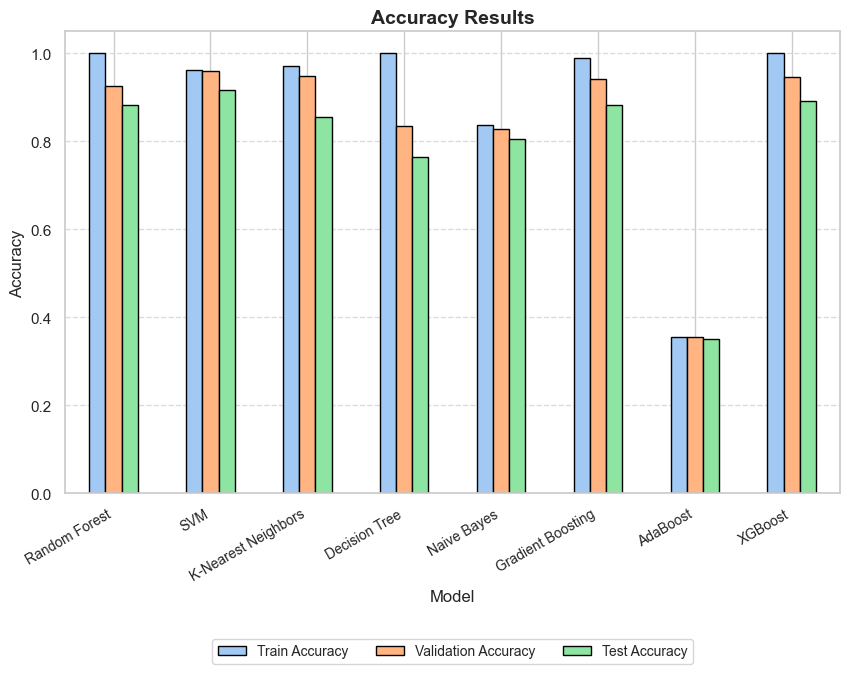

In [40]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Define color palette
colors = sns.color_palette("pastel")[:3]  

# Create bar plot
ax = results_with_pca.plot(
    x="Model", 
    y=["Train Accuracy", "Validation Accuracy", "Test Accuracy"], 
    kind="bar", 
    figsize=(10,6), 
    color=colors, 
    edgecolor="black"
)

# Customize title and labels
ax.set_title('Accuracy Results', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha="right", fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust legend position (placed just below x-axis label)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=10)

# Show plot
plt.show()

## Hyper Parameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [47]:
xgb_classifier = XGBClassifier(random_state=42)
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
}

In [48]:
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=1,
    n_jobs=-1,  
)

In [49]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=1)

In [50]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300}
Best Score: 0.9474584326336348


In [52]:
xgb = XGBClassifier(learning_rate= 0.2, max_depth= 3, min_child_weight= 1, n_estimators= 300)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [53]:
from sklearn.metrics import classification_report

In [54]:
y_pred = xgb.predict(X_test)

In [55]:
y_pred

array([2, 2, 2, ..., 5, 5, 3])

In [58]:
report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print("Classification Report:\n", report)

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.85      0.81      0.83       491
          STANDING       0.84      0.90      0.87       532
           WALKING       0.88      0.96      0.92       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.90      0.94      0.92       471

          accuracy                           0.90      2947
         macro avg       0.90      0.90      0.90      2947
      weighted avg       0.90      0.90      0.90      2947



In [59]:
from sklearn.metrics import confusion_matrix

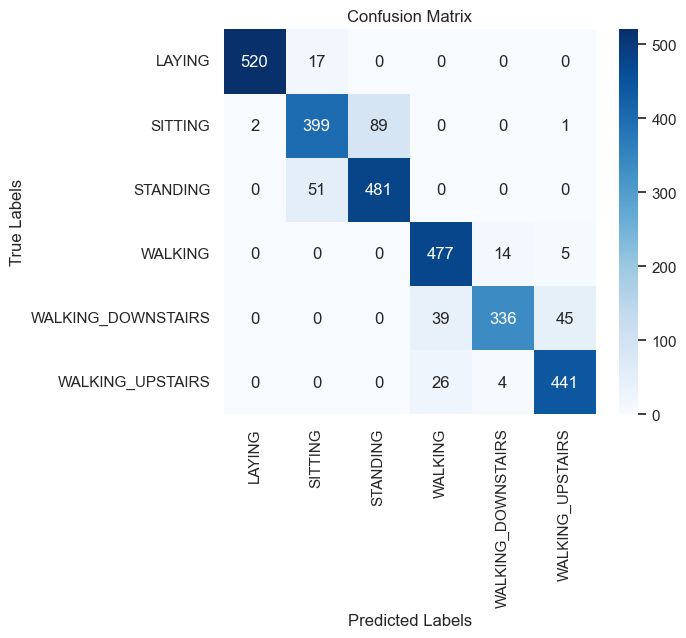

In [60]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [61]:
import joblib
joblib.dump(xgb,'xgb_model.joblib')

['xgb_model.joblib']

In [62]:
model = joblib.load('xgb_model.joblib')

In [63]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)